In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv("dataset.csv", sep=",")

# Popis datasetu a jeho features
| Variable Name                   | Role     | Type         | Demographic   | Description                                                 | Units | Missing Values |
|---------------------------------|----------|--------------|---------------|-------------------------------------------------------------|-------|----------------|
| Gender                          | Feature  | Categorical  | Gender        |                                                             |       | no             |
| Age                             | Feature  | Continuous   | Age           |                                                             |       | no             |
| Height                          | Feature  | Continuous   |               |                                                             |       | no             |
| Weight                          | Feature  | Continuous   |               |                                                             |       | no             |
| family_history_with_overweight  | Feature  | Binary       |               | Has a family member suffered or suffers from overweight?    |       | no             |
| FAVC                            | Feature  | Binary       |               | Do you eat high caloric food frequently?                    |       | no             |
| FCVC                            | Feature  | Integer      |               | Do you usually eat vegetables in your meals?                |       | no             |
| NCP                             | Feature  | Continuous   |               | How many main meals do you have daily?                      |       | no             |
| CAEC                            | Feature  | Categorical  |               | Do you eat any food between meals?                          |       | no             |
| SMOKE                           | Feature  | Binary       |               | Do you smoke?                                               |       | no             |
| CH2O                            | Feature  | Continuous   |               | How much water do you drink daily?                          |       | no             |
| SCC                             | Feature  | Binary       |               | Do you monitor the calories you eat daily?                  |       | no             |
| FAF                             | Feature  | Continuous   |               | How often do you have physical activity?                    |       | no             |
| TUE                             | Feature  | Integer      |               | How much time do you use technological devices?             |       | no             |
| CALC                            | Feature  | Categorical  |               | How often do you drink alcohol?                             |       | no             |
| MTRANS                          | Feature  | Categorical  |               | Which transportation do you usually use?                    |       | no             |
| NObeyesdad                      | Target   | Categorical  |               | Obesity level                                               |       | no             |

- Jedná se o dataset úrovní obesity  
- Tento dataset obsahuje data pro odhad úrovní obezity u jednotlivců z Mexika, Peru a Kolumbie, na základě jejich stravovacích návyků a fyzické kondice. Data zahrnují 17 atributů a 2111 záznamů, přičemž záznamy jsou označeny třídní proměnnou NObesity (Úroveň obezity), která umožňuje klasifikaci dat pomocí hodnot: Nedostatečná hmotnost, Normální hmotnost, Nadváha úroveň I, Nadváha úroveň II, Obezita typ I, Obezita typ II a Obezita typ III. 77 % dat bylo synteticky vytvořeno pomocí nástroje Weka a filtru SMOTE, zatímco 23 % dat bylo získáno přímo od uživatelů prostřednictvím webové platformy.
- Dataset je k nalezení na: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

In [3]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
df.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [14]:
df.NObeyesdad.value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [5]:
dfNumeric = df.select_dtypes(include=np.number)
dfString = df.select_dtypes(exclude=np.number)

In [7]:
dfNumeric.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
dfString.describe()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [12]:
for column in ["CAEC", "CALC", "MTRANS"]:
    print(dfString[column].unique())

['Sometimes' 'Frequently' 'Always' 'no']
['no' 'Sometimes' 'Frequently' 'Always']
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>,
        <Axes: title={'center': 'CH2O'}>],
       [<Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>,
        <Axes: >]], dtype=object)

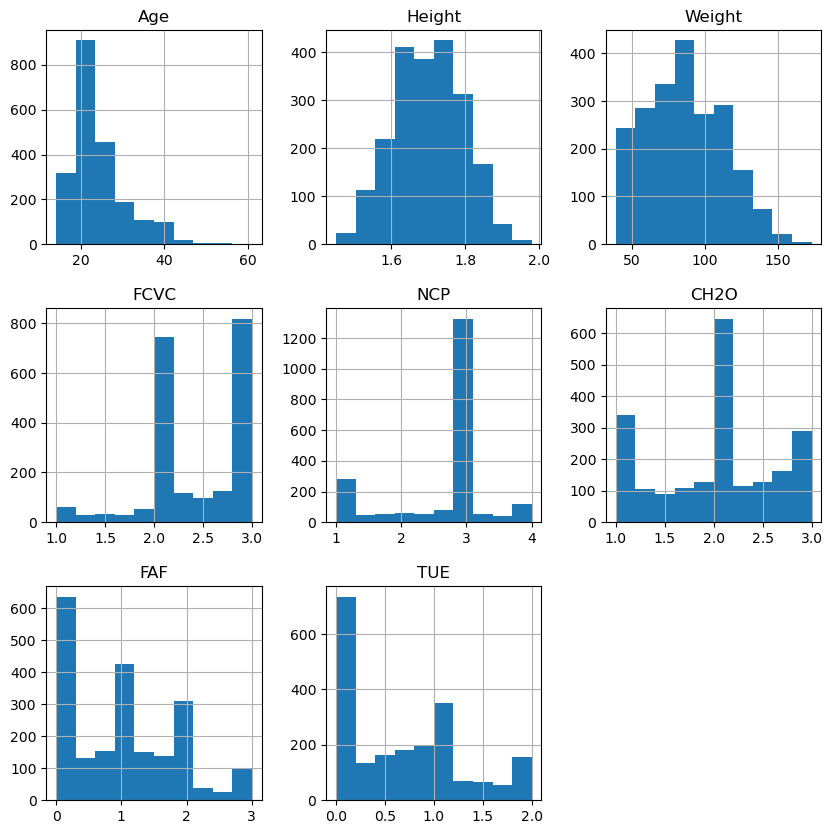

In [10]:
dfNumeric.hist(figsize=(10,10))

# Prvotní zamyšlení a jak budu dále postupovat
- Když se koukneme na data, tak vidíme, že data obsahují jak numerické tak kategorické hodnoty, bude tedy třeba provést jak scaling tak encoding.  
- Age, Height a Weight mají **normální distribuci**, ke zbytku se budeme stavět jako k features **bez normálního rozdělení**.  
- Features s normální distribucí budou scalovány pomocí **standard scaleru** a zbytek bude pomocí **robust scaleru**.  
- Máme 5 binárních kategorických features (Gender a potom ano/ne features). Na ty použijeme **ordinal encoding**.  
- Poté když se podíváme na kategorické hodnoty zbylých 3 features (nepočítaje label feature), tak u jejich hodnot lze vytvořit číselné seřazení, které dává smysl (hodnoty od no až po Always 0-3 např) a tak použijeme taky **ordinal encoding**.
- Co se týče label feature, tak u té taky lze vytvořit číselnou reprezentaci hodnot a zachovat vztah mezi nimi (Od Insufficient_Weight až po Obesity_Type_III) a tedy bude taky encoded pomocí **ordinal encodingu**.
- Jedná se o vyvážený dataset a tak můžeme použít **accuracy** jako scoring metodu.

In [24]:
X, y = df.loc[:,df.columns[:-1]], df.loc[:,df.columns[-1]]
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


In [25]:
y

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

# Creating pipeline
- I will create data processing pipeline that is going to at first encode categorical features and then scale all features depending on their distribution.
- It will also split dataset into train and test samples 

In [44]:
import sklearn.model_selection
import sklearn.preprocessing


def pipeline(X, y):
    # Encode label
    ordinalEncoderLabel = sklearn.preprocessing.OrdinalEncoder(categories=[['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']])
    y = ordinalEncoderLabel.fit_transform(y.to_numpy().reshape(-1,1))
    # Split dataset into train and test, always fit on train and just transform on test
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=13)
    # Encoding
    ordinalFeatures = ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC"]
    ordinalEncoder = sklearn.preprocessing.OrdinalEncoder()
    X_train[ordinalFeatures] = ordinalEncoder.fit_transform(X_train[ordinalFeatures])
    X_test[ordinalFeatures] = ordinalEncoder.transform(X_test[ordinalFeatures])

    customFeatures = ["CAEC", "CALC", "MTRANS"]
    customEncoder = sklearn.preprocessing.OrdinalEncoder(categories=[
        ['no', 'Sometimes', 'Frequently', 'Always'],
        ['no','Sometimes', 'Frequently', 'Always'],
        ['Walking', 'Bike', 'Public_Transportation', 'Motorbike', 'Automobile']])
    X_train[customFeatures] = customEncoder.fit_transform(X_train[customFeatures])
    X_test[customFeatures] = customEncoder.transform(X_test[customFeatures])

    # Scaling
    normalDistribution = ["Age", "Height", "Weight"]
    others = [col for col in X.columns if col not in normalDistribution]
    standardScaler = sklearn.preprocessing.StandardScaler()
    X_train[normalDistribution] = standardScaler.fit_transform(X_train[normalDistribution])
    X_test[normalDistribution] = standardScaler.transform(X_test[normalDistribution])
    robustScaler = sklearn.preprocessing.RobustScaler()
    X_train[others] = robustScaler.fit_transform(X_train[others])
    X_test[others] = robustScaler.transform(X_test[others])
    return X_train, X_test, y_train, y_test




In [45]:
X_train, X_test, y_train, y_test = pipeline(X, y)

In [46]:
X_train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
908,0.0,-0.124282,0.152211,-0.436457,0.0,0.0,-0.393837,0.000000,0.0,0.0,0.000000,0.0,-0.585265,1.381224,0.0,0.0
1656,0.0,2.417452,0.639400,1.143393,0.0,0.0,-0.347186,-0.493215,0.0,0.0,-0.304186,0.0,-0.276989,-0.586035,0.0,2.0
2107,-1.0,-0.365907,0.485060,1.780161,0.0,0.0,0.606163,0.000000,0.0,0.0,0.005824,0.0,0.227459,0.013235,0.0,0.0
1311,0.0,1.110153,-0.336367,0.119058,0.0,0.0,0.073165,-3.587256,0.0,0.0,0.118135,0.0,0.660654,-0.586035,0.0,2.0
955,-1.0,1.591025,-0.294622,-0.507470,0.0,0.0,0.606163,-1.870440,0.0,0.0,-0.556612,0.0,-0.554923,-0.586035,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.0,1.472767,-0.140891,-0.108787,0.0,-1.0,-0.393837,0.000000,0.0,0.0,1.135326,0.0,0.666274,-0.586035,-1.0,2.0
1780,0.0,0.344252,-0.138092,0.619593,0.0,0.0,0.255569,-5.869619,0.0,0.0,-0.961297,0.0,-0.521754,0.032977,-1.0,0.0
866,-1.0,-0.975319,-2.186353,-1.195741,-1.0,0.0,-0.393837,0.000000,0.0,0.0,-0.823432,1.0,-0.579724,0.392539,0.0,0.0
74,0.0,-0.057287,-0.034044,-0.070813,0.0,0.0,-0.393837,0.000000,1.0,0.0,1.135326,0.0,-0.666274,0.413965,1.0,0.0


array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'family_history_with_overweight'}>,
        <Axes: title={'center': 'FAVC'}>,
        <Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>],
       [<Axes: title={'center': 'CAEC'}>,
        <Axes: title={'center': 'SMOKE'}>,
        <Axes: title={'center': 'CH2O'}>,
        <Axes: title={'center': 'SCC'}>],
       [<Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>,
        <Axes: title={'center': 'CALC'}>,
        <Axes: title={'center': 'MTRANS'}>]], dtype=object)

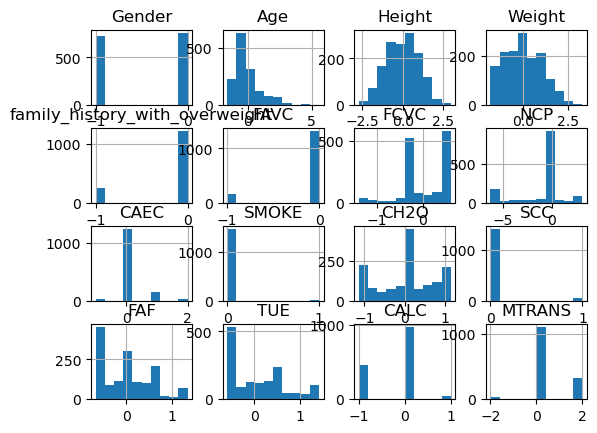

In [47]:
X_train.hist()

# Experimentální část
- Rozhodl jsem se, pro dobrou reprezentaci dat a porovnatelnost výsledků experimentů, dělat hyperparameter tuning za pomocí for smyček místo GridSearchCV, který bych normálně použil.
- Jak již bylo výše zmíněno, tak k vyhodnocení algoritmů bude použita accuracy.
- Zvolil jsem si DecisionTree, RandomForest, SVC a KNN jakožto algoritmy pro klasifikaci.

In [48]:
import sklearn.metrics
import sklearn.tree


dt_results = []
for depth in [3, 5, 10, None]:
    for min_leaf_size in [2, 5, 10, 20]:
        dt = sklearn.tree.DecisionTreeClassifier(max_depth=depth, criterion='gini', min_samples_leaf=min_leaf_size, random_state=42)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        acc = sklearn.metrics.accuracy_score(y_test, y_pred)
        dt_results.append({'max_depth': depth, 'min_samples_leaf': min_leaf_size, 'accuracy': acc})

dt_results_df = pd.DataFrame(dt_results)
print(dt_results_df)


    max_depth  min_samples_leaf  accuracy
0         3.0                 2  0.629338
1         3.0                 5  0.629338
2         3.0                10  0.629338
3         3.0                20  0.629338
4         5.0                 2  0.817035
5         5.0                 5  0.817035
6         5.0                10  0.815457
7         5.0                20  0.812303
8        10.0                 2  0.938486
9        10.0                 5  0.924290
10       10.0                10  0.894322
11       10.0                20  0.875394
12        NaN                 2  0.938486
13        NaN                 5  0.924290
14        NaN                10  0.894322
15        NaN                20  0.875394


In [ ]:
import sklearn.ensemble


rf_results = []
for n_estimators in [50, 100, 200]:
    for max_depth in [3, 5, 10, None]:
        rf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=13)
        rf.fit(X_train, y_train.ravel())
        y_pred = rf.predict(X_test)
        acc = sklearn.metrics.accuracy_score(y_test, y_pred)
        rf_results.append({'n_estimators': n_estimators, 'max_depth': max_depth, 'accuracy': acc})

rf_results_df = pd.DataFrame(rf_results)
print(rf_results_df)

    n_estimators  max_depth  accuracy
0             50        3.0  0.684543
1             50        5.0  0.828076
2             50       10.0  0.929022
3             50        NaN  0.943218
4            100        3.0  0.701893
5            100        5.0  0.842271
6            100       10.0  0.941640
7            100        NaN  0.947950
8            200        3.0  0.700315
9            200        5.0  0.847003
10           200       10.0  0.943218
11           200        NaN  0.947950


In [52]:
svm_results = []
for c in [0.1, 1, 10, 1000, 10000]:
    for gamma in [1, 0.1, 0.01, 0.001, 0.0001]:
        svm = sklearn.svm.SVC(kernel='rbf', C=c, gamma = gamma, random_state=13)
        svm.fit(X_train, y_train.ravel())
        y_pred = svm.predict(X_test)
        acc = sklearn.metrics.accuracy_score(y_test, y_pred)
        svm_results.append({'C': c, 'gamma': gamma, 'accuracy': acc})

svm_results_df = pd.DataFrame(svm_results)
print(svm_results_df)


          C   gamma  accuracy
0       0.1  1.0000  0.408517
1       0.1  0.1000  0.670347
2       0.1  0.0100  0.433754
3       0.1  0.0010  0.162461
4       0.1  0.0001  0.162461
5       1.0  1.0000  0.845426
6       1.0  0.1000  0.894322
7       1.0  0.0100  0.788644
8       1.0  0.0010  0.479495
9       1.0  0.0001  0.162461
10     10.0  1.0000  0.858044
11     10.0  0.1000  0.925868
12     10.0  0.0100  0.914826
13     10.0  0.0010  0.769716
14     10.0  0.0001  0.482650
15   1000.0  1.0000  0.858044
16   1000.0  0.1000  0.925868
17   1000.0  0.0100  0.955836
18   1000.0  0.0010  0.951104
19   1000.0  0.0001  0.921136
20  10000.0  1.0000  0.858044
21  10000.0  0.1000  0.925868
22  10000.0  0.0100  0.952681
23  10000.0  0.0010  0.955836
24  10000.0  0.0001  0.952681


In [54]:
import sklearn.neighbors

knn_results = []
for n_neighbors in [3, 5, 10, 15]:
    for weight in ['uniform', 'distance']:
        for algorithm in ['auto', 'ball_tree', 'kd_tree', 'brute']:
            knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights=weight, algorithm = algorithm)
            knn.fit(X_train, y_train.ravel())
            y_pred = knn.predict(X_test)
            acc = sklearn.metrics.accuracy_score(y_test, y_pred)
            knn_results.append({'n_neighbors': n_neighbors, 'weights': weight, 'algorithm': algorithm, 'accuracy': acc})

knn_results_df = pd.DataFrame(knn_results)
print(knn_results_df)


    n_neighbors   weights  algorithm  accuracy
0             3   uniform       auto  0.848580
1             3   uniform  ball_tree  0.848580
2             3   uniform    kd_tree  0.848580
3             3   uniform      brute  0.848580
4             3  distance       auto  0.851735
5             3  distance  ball_tree  0.851735
6             3  distance    kd_tree  0.851735
7             3  distance      brute  0.851735
8             5   uniform       auto  0.834385
9             5   uniform  ball_tree  0.834385
10            5   uniform    kd_tree  0.834385
11            5   uniform      brute  0.834385
12            5  distance       auto  0.853312
13            5  distance  ball_tree  0.853312
14            5  distance    kd_tree  0.853312
15            5  distance      brute  0.853312
16           10   uniform       auto  0.804416
17           10   uniform  ball_tree  0.804416
18           10   uniform    kd_tree  0.804416
19           10   uniform      brute  0.804416
20           

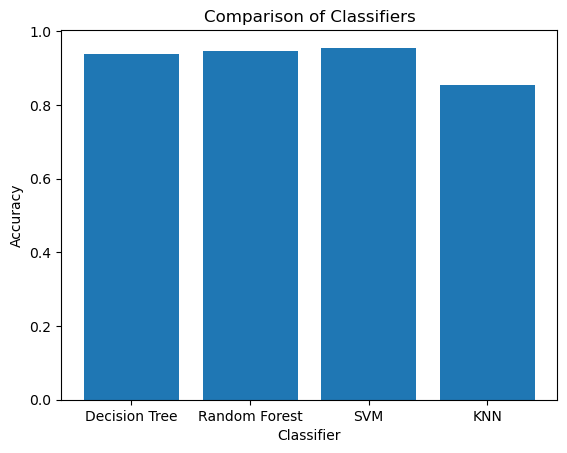

In [55]:
import matplotlib.pyplot as plt

classifiers = ['Decision Tree', 'Random Forest', 'SVM', 'KNN']
accuracies = [
    dt_results_df['accuracy'].max(),
    rf_results_df['accuracy'].max(),
    svm_results_df['accuracy'].max(),
    knn_results_df['accuracy'].max()
]

plt.bar(classifiers, accuracies)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifiers')
plt.show()


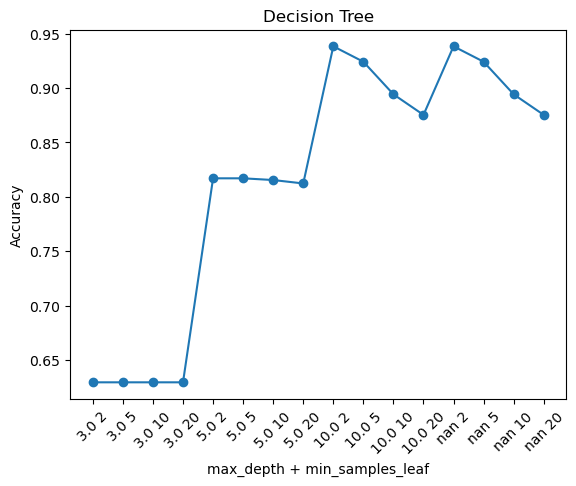

In [61]:
plt.plot(dt_results_df['max_depth'].astype(str) + " " + dt_results_df['min_samples_leaf'].astype(str), dt_results_df['accuracy'], marker='o')
plt.xlabel('max_depth + min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('Decision Tree')
plt.xticks(rotation=45)
plt.show()


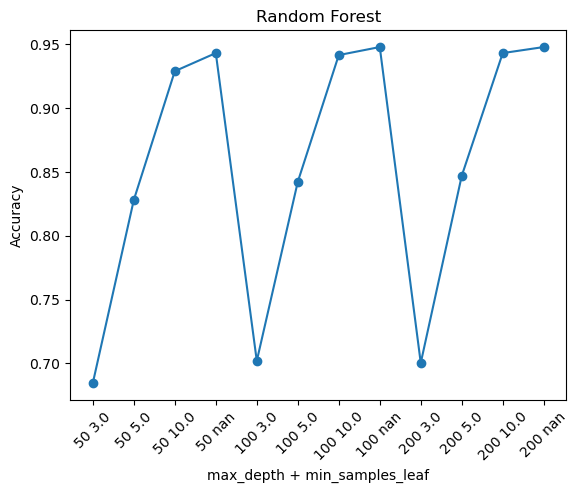

In [64]:
plt.plot(rf_results_df['n_estimators'].astype(str) + " " + rf_results_df['max_depth'].astype(str), rf_results_df['accuracy'], marker='o')
plt.xlabel('n_estimators + max_depth')
plt.ylabel('Accuracy')
plt.title('Random Forest')
plt.xticks(rotation=45)
plt.show()

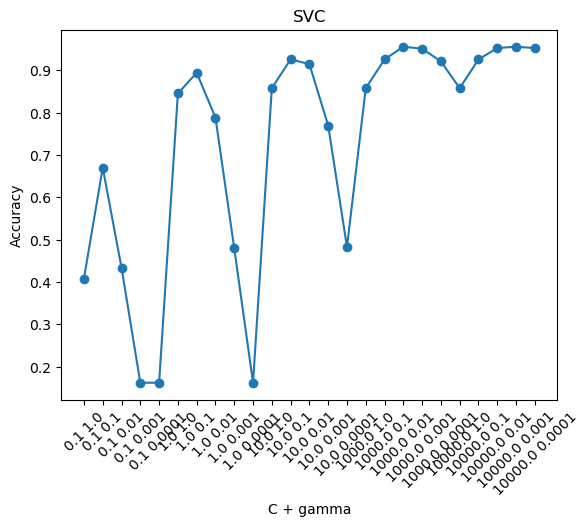

In [65]:
plt.plot(svm_results_df['C'].astype(str) + " " + svm_results_df['gamma'].astype(str), svm_results_df['accuracy'], marker='o')
plt.xlabel('C + gamma')
plt.ylabel('Accuracy')
plt.title('SVC')
plt.xticks(rotation=45)
plt.show()

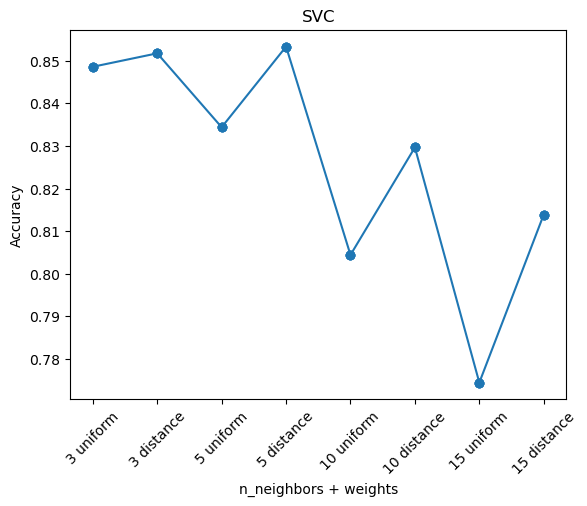

In [ ]:
# Different algorithm didnt contribute in any way to final accuracy, therefore I have removed it from plot 

plt.plot(knn_results_df['n_neighbors'].astype(str) + " " + knn_results_df['weights'].astype(str), knn_results_df['accuracy'], marker='o')
plt.xlabel('n_neighbors + weights')
plt.ylabel('Accuracy')
plt.title('SVC')
plt.xticks(rotation=45)
plt.show()